<a href="https://colab.research.google.com/github/Y-YHat/gen_ai_course/blob/main/1_Data_Exploration_using_Amazon_book_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem statement: Visualizing Amazon Reviews

This notebook is focused on exploring Amazon product review data through various visualization techniques. The primary goal is to uncover insights from the data by examining the relationship between different variables

This exploration involves creating scatterplots, bar charts, box plots, line plots, pie charts, and word clouds to effectively analyze and interpret the data, thereby providing a comprehensive overview of consumer feedback on Amazon products.

The notebook contains one exercise in total:

* [Exercise 1](#ex_1)

In [8]:
# from google.colab import files
# uploaded = files.upload()

In [9]:
# Import necessary libraries
import pandas as pd

df = pd.read_csv('amazon-product-review-data.csv')

# Verify if the dataset is loaded correctly
print(df.head())

  market_place customer_id         review_id    product_id product_parent  \
0         "US"  "42521656"  "R26MV8D0KG6QI6"  "B000SAQCWC"    "159713740"   
1         "US"  "12049833"  "R1OF8GP57AQ1A0"  "B00509LVIQ"    "138680402"   
2         "US"    "107642"  "R3VDC1QB6MC4ZZ"  "B00KHXESLC"    "252021703"   
3         "US"   "6042304"  "R12FA3DCF8F9ER"  "B000F8JIIC"    "752728342"   
4         "US"  "18123821"   "RTWHVNV6X4CNJ"  "B004ZWR9RQ"    "552138758"   

                                       product_title product_category  \
0  "The Cravings Place Chocolate Chunk Cookie Mix...        "Grocery"   
1          "Mauna Loa Macadamias, 11 Ounce Packages"        "Grocery"   
2  "Organic Matcha Green Tea Powder - 100% Pure M...        "Grocery"   
3  "15oz Raspberry Lyons Designer Dessert Syrup S...        "Grocery"   
4  "Stride Spark Kinetic Fruit Sugar Free Gum, 14...        "Grocery"   

   star_rating  helpful_votes  total_votes     vine verified_purchase  \
0            1           

In [10]:
# Display basic information about the dataset
print(df.info())

# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   market_place       500 non-null    object
 1   customer_id        500 non-null    object
 2   review_id          500 non-null    object
 3   product_id         500 non-null    object
 4   product_parent     500 non-null    object
 5   product_title      500 non-null    object
 6   product_category   500 non-null    object
 7   star_rating        500 non-null    int64 
 8   helpful_votes      500 non-null    int64 
 9   total_votes        500 non-null    int64 
 10  vine               500 non-null    object
 11  verified_purchase  500 non-null    object
 12  review_headline    500 non-null    object
 13  review_body        500 non-null    object
 14  review_date        500 non-null    object
 15  sentiments         500 non-null    object
dtypes: int64(3), object(13)
memory usage: 62.6+ 

In [11]:
# Calculate summary statistics for numerical columns
summary_stats = df.describe()

# Print the summary statistics
print(summary_stats)

       star_rating  helpful_votes  total_votes
count   500.000000     500.000000   500.000000
mean      0.796000       0.764000     1.068000
std       0.403373       2.843321     3.698477
min       0.000000       0.000000     0.000000
25%       1.000000       0.000000     0.000000
50%       1.000000       0.000000     0.000000
75%       1.000000       1.000000     1.000000
max       1.000000      36.000000    47.000000


In [12]:
# Explore categorical variables
categorical_columns = ['market_place', 'product_category', 'sentiments']

for column in categorical_columns:
    category_counts = df[column].value_counts()
    print(f"Category counts for {column}:\n{category_counts}\n")

Category counts for market_place:
"US"    500
Name: market_place, dtype: int64

Category counts for product_category:
"Grocery"                   100
"Digital_Ebook_Purchase"    100
"Jewelry"                   100
"PC"                        100
"Books"                     100
Name: product_category, dtype: int64

Category counts for sentiments:
positive    398
negative    102
Name: sentiments, dtype: int64



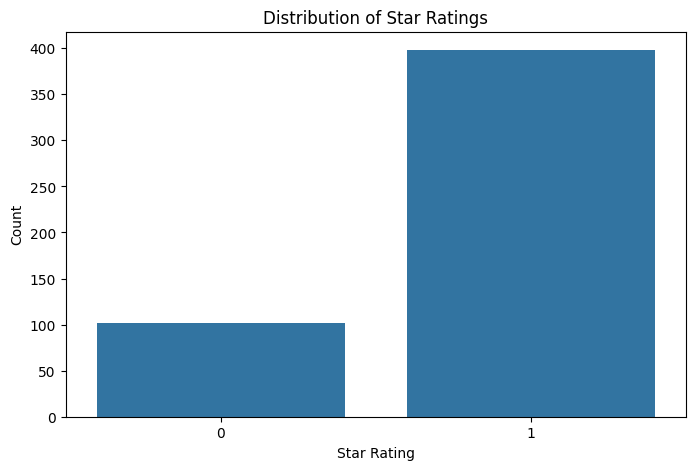

In [13]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram for star ratings
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='star_rating')
plt.title('Distribution of Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Count')
plt.show()

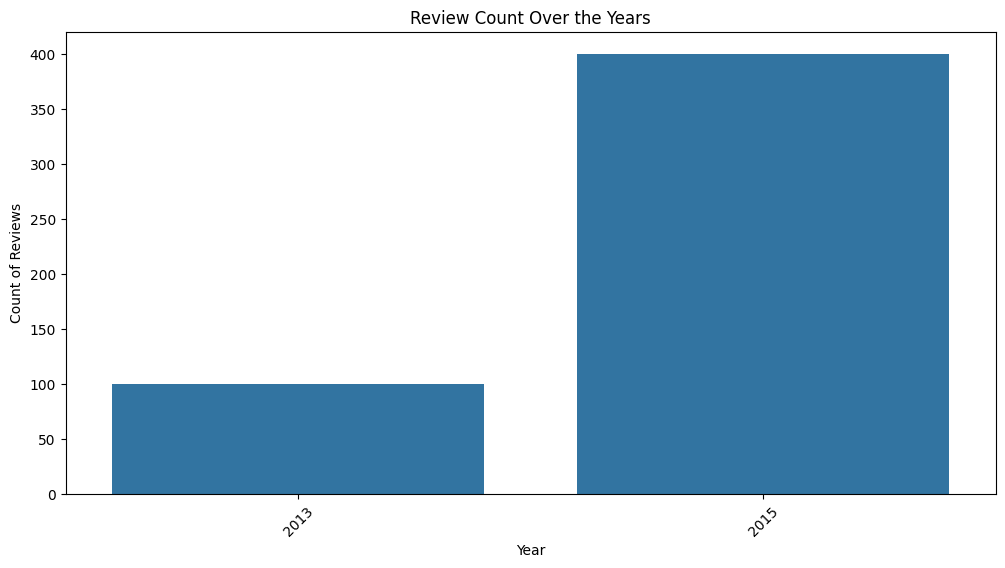

In [14]:
# Convert the 'review_date' column to a datetime format
df['review_date'] = pd.to_datetime(df['review_date'])

# Extract year and month from the 'review_date' column
df['review_year'] = df['review_date'].dt.year
df['review_month'] = df['review_date'].dt.strftime('%B')
df['review_day'] = df['review_date'].dt.strftime('%A')

# Plot the count of reviews over the years
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='review_year')
plt.title('Review Count Over the Years')
plt.xlabel('Year')
plt.ylabel('Count of Reviews')
plt.xticks(rotation=45)
plt.show()

count     500.000000
mean      243.754000
std       474.800472
min         6.000000
25%        40.000000
50%       109.000000
75%       247.250000
max      5868.000000
Name: review_body_length, dtype: float64


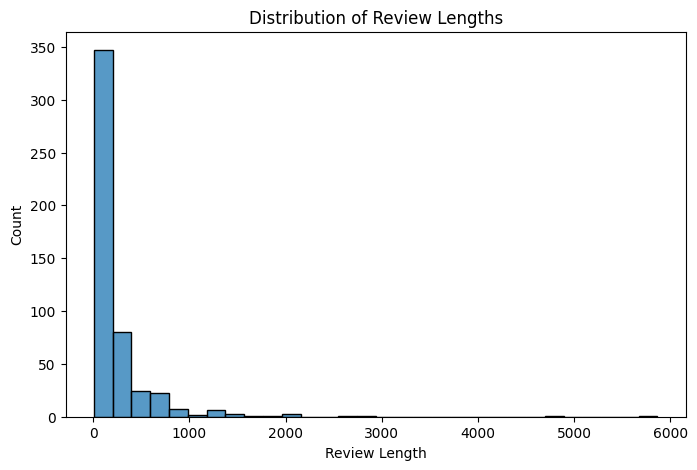

In [15]:
# Calculate the length of each review
df['review_body_length'] = df['review_body'].apply(len)

# Calculate descriptive statistics for review length
review_length_stats = df['review_body_length'].describe()

# Print the review length statistics
print(review_length_stats)

# Create a histogram for review lengths
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='review_body_length', bins=30)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Count')
plt.show()

<ipython-input-16-3137580b5117>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


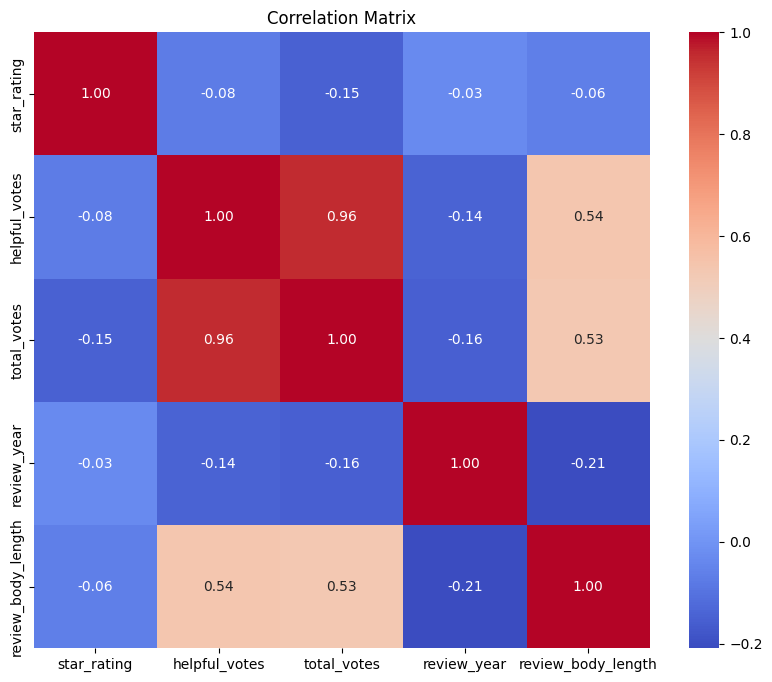

In [16]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()

<a name="ex_1"></a>
# Exercise 1

**Tasks:**

- Create a scatterplot to visualize the relationship between star ratings and review length
- Create a bar chart to visualize the average star rating for each product category
- Create a box plot to visualize the distribution of star ratings for each product category
- Create a line plot to visualize the trend of star ratings over time
- Create a pie chart to visualize the distribution of sentiments
- Create a word cloud to visualize the most common words in the reviews

In [23]:
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


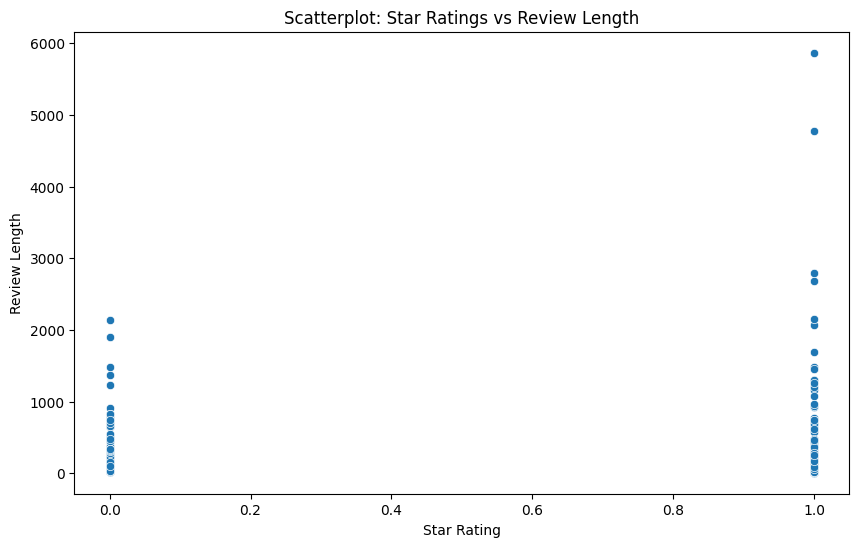

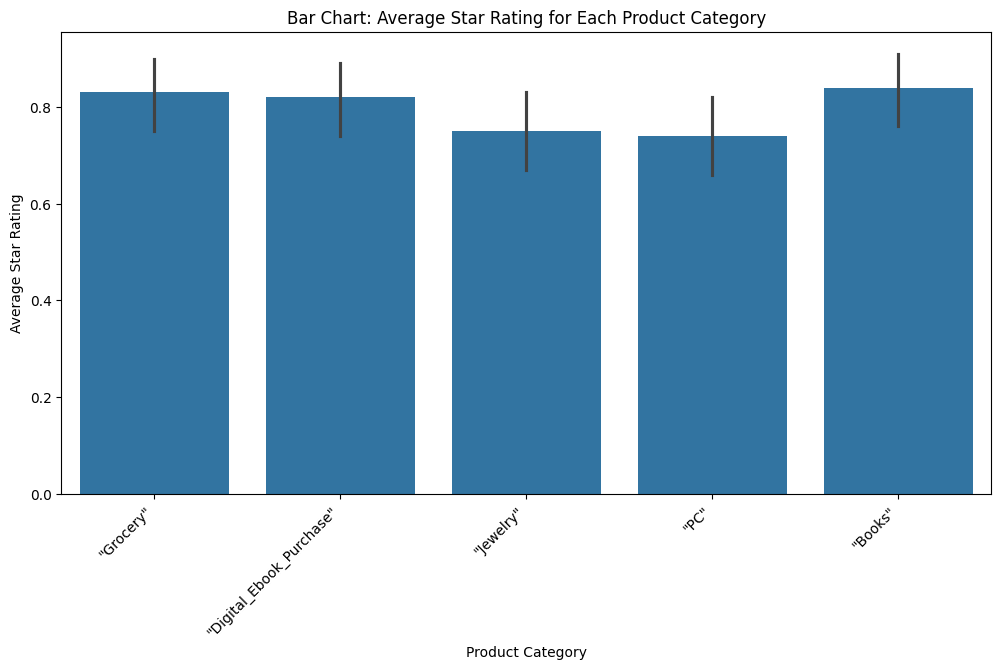

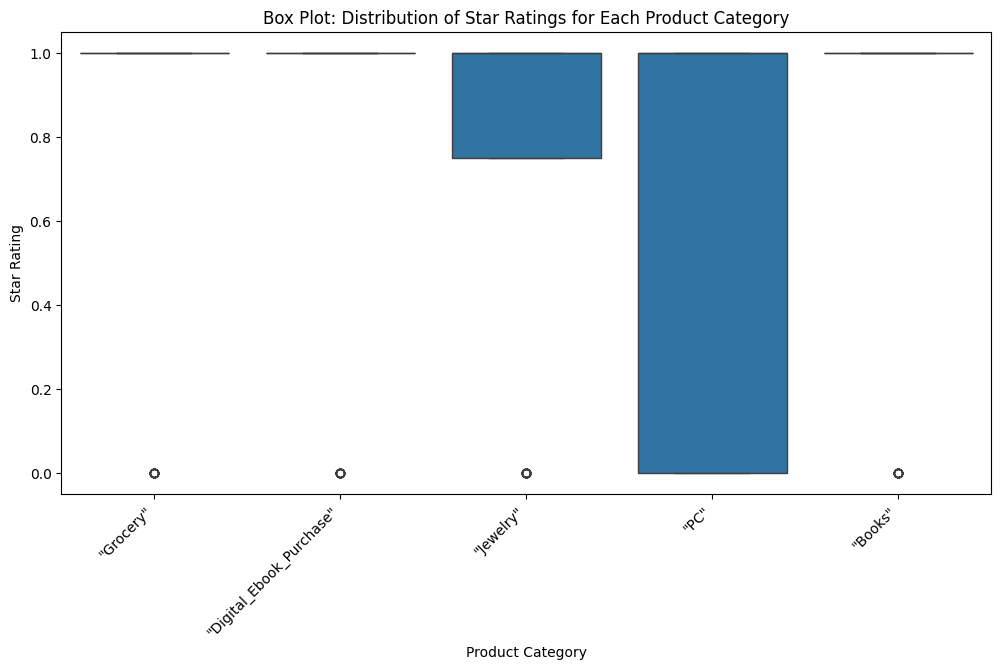

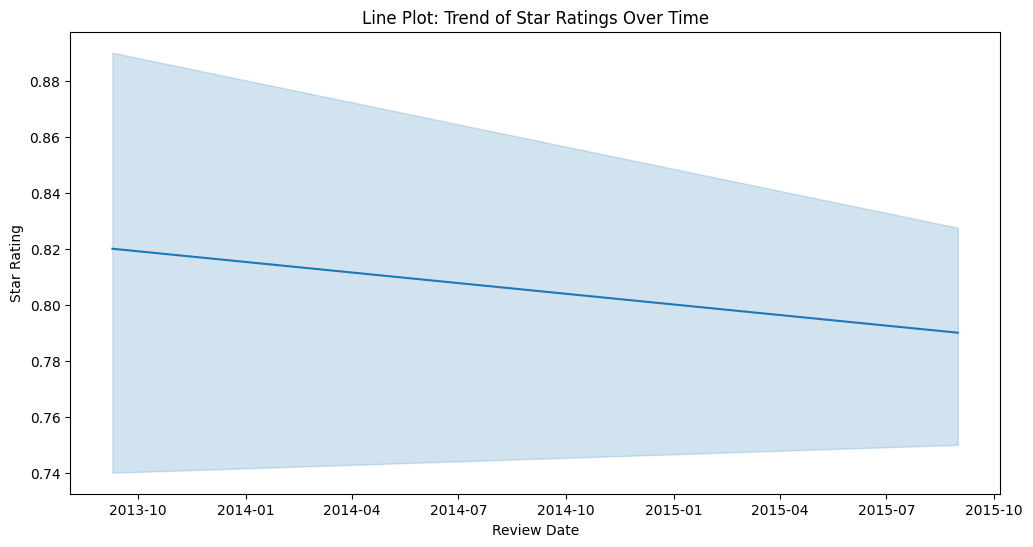

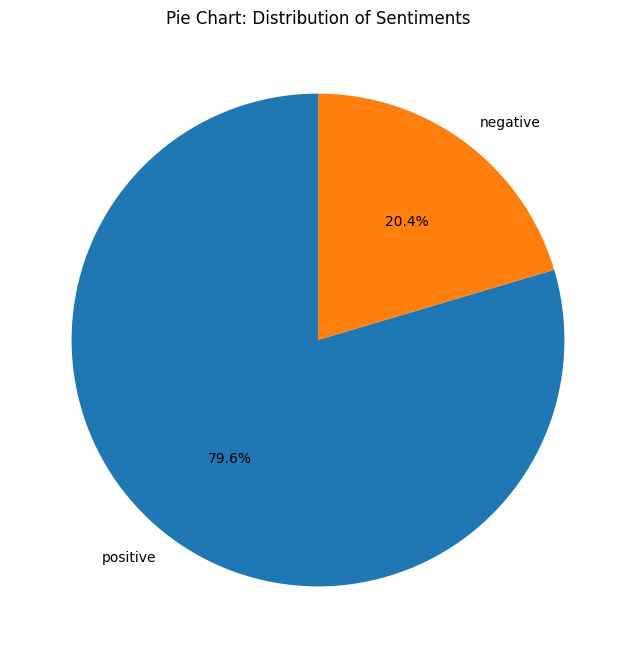

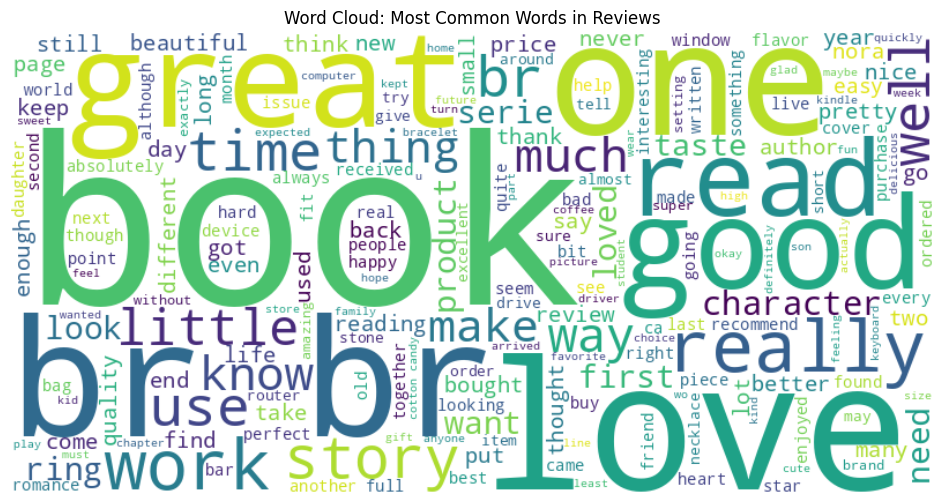

In [26]:
# Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Task 1: Scatterplot - Relationship between star ratings and review length
plt.figure(figsize=(10, 6))
sns.scatterplot(x='star_rating', y=df['review_body'].apply(len), data=df)
plt.title('Scatterplot: Star Ratings vs Review Length')
plt.xlabel('Star Rating')
plt.ylabel('Review Length')
plt.show()

# Task 2: Bar chart - Average star rating for each product category
plt.figure(figsize=(12, 6))
sns.barplot(x='product_category', y='star_rating', data=df)
plt.title('Bar Chart: Average Star Rating for Each Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Star Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

# Task 3: Box plot - Distribution of star ratings for each product category
plt.figure(figsize=(12, 6))
sns.boxplot(x='product_category', y='star_rating', data=df)
plt.title('Box Plot: Distribution of Star Ratings for Each Product Category')
plt.xlabel('Product Category')
plt.ylabel('Star Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

# Task 4: Line plot - Trend of star ratings over time
df['review_date'] = pd.to_datetime(df['review_date'])
plt.figure(figsize=(12, 6))
sns.lineplot(x='review_date', y='star_rating', data=df)
plt.title('Line Plot: Trend of Star Ratings Over Time')
plt.xlabel('Review Date')
plt.ylabel('Star Rating')
plt.show()

# Task 5: Pie chart - Distribution of sentiments
sentiment_counts = df['sentiments'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart: Distribution of Sentiments')
plt.show()

# Task 6: Word cloud - Most common words in reviews
stop_words = set(stopwords.words('english'))
all_words = ' '.join(df['review_body'].str.lower())
filtered_words = [word for word in word_tokenize(all_words) if word.isalpha() and word not in stop_words]
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_words))

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud: Most Common Words in Reviews')
plt.show()
